In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def filter_df(df, filters):
    df_filtered = df.copy()
    for col, val in filters.items():
        if isinstance(val, list):
            df_filtered = df_filtered[df_filtered[col].isin(val)]
        else:
            df_filtered = df_filtered[df_filtered[col] == val]
    return df_filtered

In [3]:
stats = pd.read_csv('../results/dpapt/cluster_extended/stats.csv')
stats['t_span'] = stats['tu'] - stats['tl'] + 1
stats['hd_norm'] = stats["hausdorff"] / np.sqrt(2 * stats["t_span"])

In [4]:
idv_hd = pd.read_csv('../results/dpapt/cluster_extended/indiv_hd.csv')
idv_hd['t_span'] = idv_hd['tu'] - idv_hd['tl'] + 1
idv_hd['hd_norm'] = idv_hd["individual_hausdorff"] / np.sqrt(2 * idv_hd["t_span"])

In [5]:
baseline_idv_hd = pd.read_csv('../results/hua/medium/indiv_hd.csv')
baseline_idv_hd['t_span'] = baseline_idv_hd['tu'] - baseline_idv_hd['tl'] + 1
baseline_idv_hd['hd_norm'] = baseline_idv_hd["individual_hausdorff"] / np.sqrt(2 * baseline_idv_hd["t_span"])

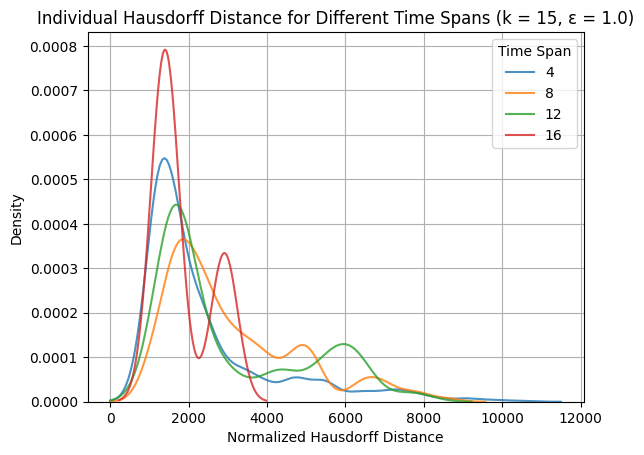

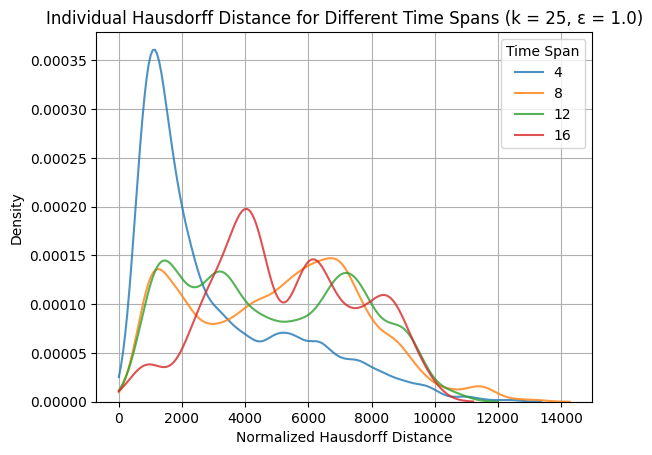

In [22]:
t_spans = sorted(idv_hd["t_span"].unique())
palette = sns.color_palette("tab10", n_colors=len(t_spans))
tspan_colors = {ts: palette[i] for i, ts in enumerate(t_spans)}

for k in idv_hd["n_clusters"].unique():

    for t_span in t_spans:
        # Filter DPAPT result
        idv_hd_span = idv_hd[
            (idv_hd["t_span"] == t_span) &
            (idv_hd["eps"] == 1.0) &
            (idv_hd["n_clusters"] == k)
        ]

        sns.kdeplot(
            data=idv_hd_span,
            x="hd_norm",
            weights="count",
            fill=False,
            alpha=0.8,
            label=f"{t_span}",
            color=tspan_colors[t_span],
            linestyle="-",
            bw_adjust=0.5,
            common_norm=False,
            clip=(0, None)
        )

        # # Filter baseline
        # baseline_idv_hd_span = baseline_idv_hd[
        #     (baseline_idv_hd["t_span"] == t_span) &
        #     (baseline_idv_hd["ep"] == 2.0)
        # ]

        # sns.kdeplot(
        #     data=baseline_idv_hd_span,
        #     x="hd_norm",
        #     fill=False,
        #     alpha=0.8,
        #     weights="count",
        #     label=f"Baseline {t_span}",
        #     color=tspan_colors[t_span],
        #     linestyle="--",
        #     bw_adjust=0.5,
        #     common_norm=False
        # )

    plt.legend(title="Time Span")
    plt.xlabel("Normalized Hausdorff Distance")
    plt.title(f"Individual Hausdorff Distance for Different Time Spans (k = {k}, ε = 1.0)")
    plt.grid(True)
    plt.savefig(f"../figures/dpapt/hd_norm_k_{k}.pdf", bbox_inches='tight')
    plt.show()

In [7]:
query = pd.read_csv('../results/dpapt/cluster_extended/query_distortion.csv')
query['t_span'] = query['tu'] - query['tl'] + 1

<Axes: xlabel='t_span', ylabel='psi_distortion_rel'>

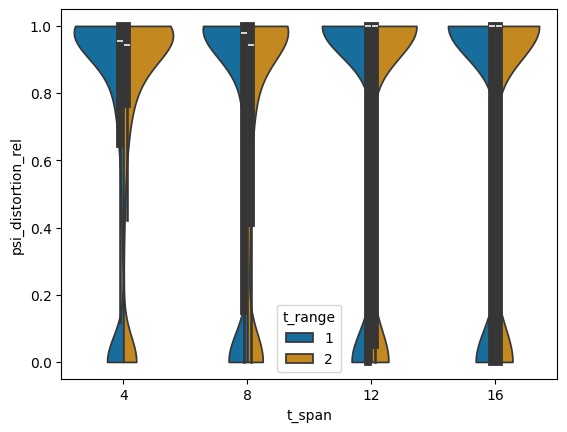

In [8]:
sns.violinplot(
    data=filter_df(query, {"eps": 2.0, "n_clusters": 15, "t_range": [1, 2]}),
    x='t_span',
    y='psi_distortion_rel',
    hue='t_range',
    split=True,
    palette="colorblind",
    cut=0,
)

In [9]:
query_sample = pd.read_csv('../results/dpapt/post/cluster/filter/query_distortion_sample.csv')
query_sample['t_span'] = query_sample['tu'] - query_sample['tl'] + 1

query_center = pd.read_csv('../results/dpapt/post/cluster/filter/query_distortion_center.csv')
query_center['t_span'] = query_center['tu'] - query_center['tl'] + 1

In [10]:
query_center["Method"] = "Center"
query_sample["Method"] = "Sample"
query_combined = pd.concat([query_center, query_sample], ignore_index=True)

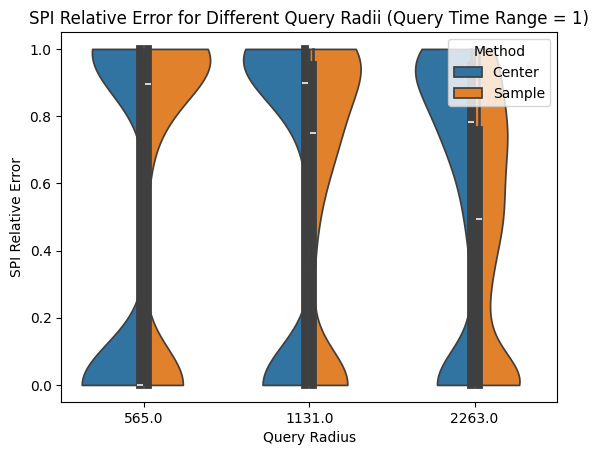

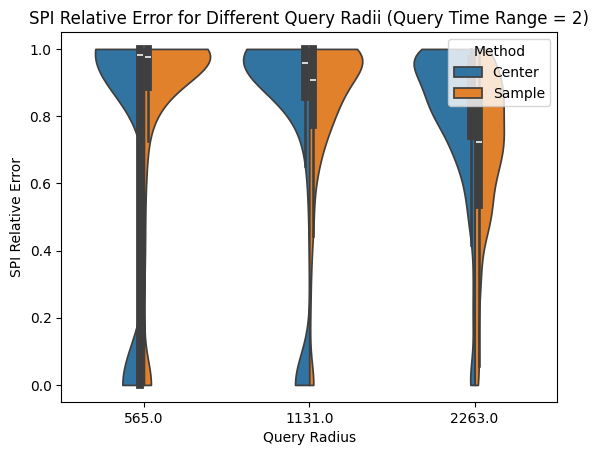

In [24]:
for t_range in [1, 2]:
    filtered = filter_df(query_combined, {"eps": 2.0, "n_clusters": 20, "t_range": t_range, "t_span": 3})
    sns.violinplot(
        data=filtered,
        x='radius',
        y='psi_distortion_rel',
        hue='Method',
        split=True,
        cut=0,
    )
    plt.title(f"SPI Relative Error for Different Query Radii (Query Time Range = {t_range})")
    plt.xlabel("Query Radius")
    plt.ylabel("SPI Relative Error")
    plt.savefig(f"../figures/dpapt/query_distortion_range_{t_range}.pdf")
    plt.show()

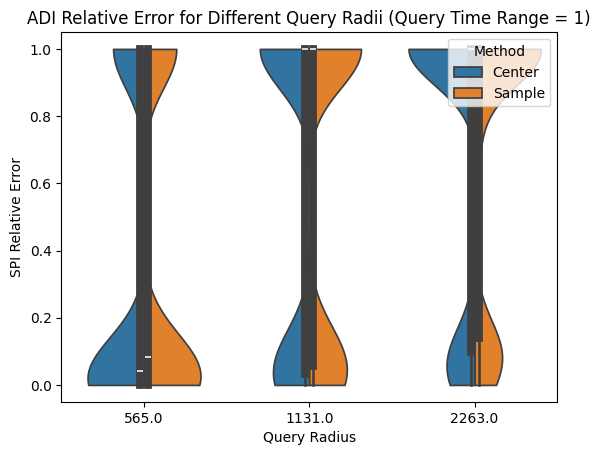

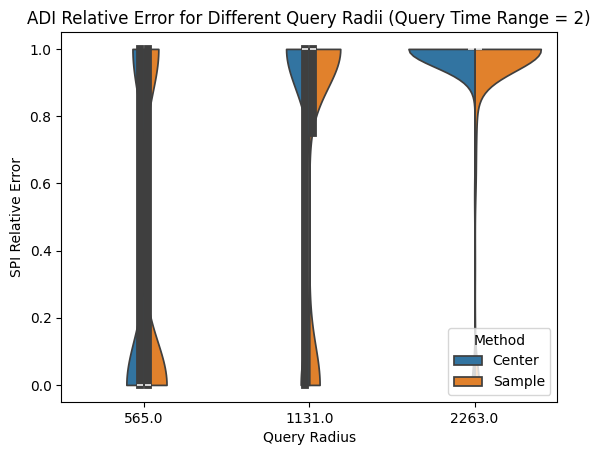

In [23]:
for t_range in [1, 2]:
    filtered = filter_df(query_combined, {"eps": 2.0, "n_clusters": 40, "t_range": t_range, "t_span": 3})
    sns.violinplot(
        data=filtered,
        x='radius',
        y='dai_distortion_rel',
        hue='Method',
        split=True,
        cut=0,
    )
    plt.title(f"ADI Relative Error for Different Query Radii (Query Time Range = {t_range})")
    plt.xlabel("Query Radius")
    plt.ylabel("SPI Relative Error")
    plt.savefig(f"../figures/dpapt/dai_query_distortion_range_{t_range}.pdf")
    plt.show()

/tmp/ipykernel_12983/845704476.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


<Axes: xlabel='dai_distortion_rel', ylabel='Density'>

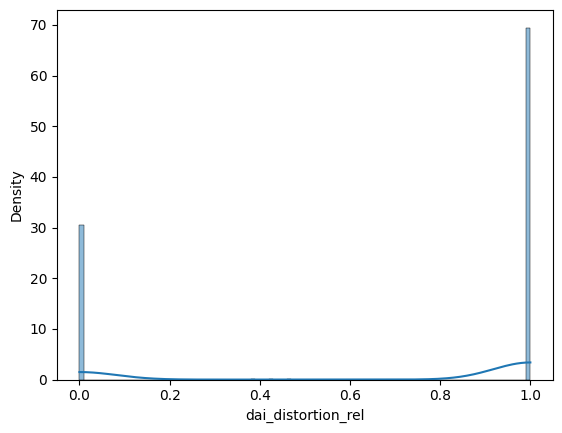

In [13]:
sns.histplot(
    data=filter_df(query, {"eps": 2.0, "n_clusters": 25, "t_range": [1, 2], "t_span": 4}),
    x='dai_distortion_rel',
    bins=100,
    kde=True,
    palette="colorblind",
    stat="density",
    common_norm=False,
)